In [1]:
import pandas as pd
import os
import numpy as np
import re
import math
import networkx as nx

In [2]:
## install this the first time you run code

## pip install openpyxl

# Functions

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

In [3]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

# Set Working Directory & Import Dataset

In [4]:
# set working directory

#os.chdir('C:\\Users\\Anne Wesley\\Documents\\IU\\network_science\\group_project')

os.getcwd()

'C:\\Users\\braxt\\Documents\\Network Science\\Final Project'

In [70]:
# Import Dataset

data = pd.read_excel('Quality of Life Dataset.xlsx')

In [71]:
# Copy to preserve data

df = data.copy(deep = True)

# Data Cleaning

In [72]:
# Clean up Dataset

# first three columns are empty - drop
df.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

# lower column names
df.columns = [x.lower() for x in df.columns] 

In [73]:
df.head()

,age,bio_sex,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,hispanic,orientation,marital_status,rel_services,education,income,employment,medication,psych_medication,psych_medication_3_text,support,phys_health,audit_1,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5,tipi_6,tipi_7,tipi_8,tipi_9,tipi_10,erq_1,erq_2,erq_3,erq_4,erq_5,erq_6,erq_7,erq_8,erq_9,erq_10,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,eq5d_1,eq5d_2,eq5d_3,eq5d_4,eq5d_5,qlesq_med_1,qlesq_med_2,qlesq_med_3,qlesq_med_4,qlesq_med_5,qlesq_med_6,qlesq_med_7,qlesq_med_8,qlesq_med_9,qlesq_med_10,qlesq_med_11,qlesq_med_12,qlesq_med_13,qlesq_med_14,qlesq_med_15,qlesq_med_16,qlesq_nomed_1,qlesq_nomed_2,qlesq_nomed_3,qlesq_nomed_4,qlesq_nomed_5,qlesq_nomed_6,qlesq_nomed_7,qlesq_nomed_8,qlesq_nomed_9,qlesq_nomed_10,qlesq_nomed_11,qlesq_nomed_12,qlesq_nomed_13,qlesq_nomed_14,qlesq_nomed_15,whoqol_1_1,whoqol_2_1,whoqol_3,whoqol_4,whoqol_5,whoqol_6,whoqol_7,whoqol_8,whoqol_9,whoqol_10,whoqol_11,whoqol_12,whoqol_13,whoqol_14,whoqol_15,whoqol_16,whoqol_17,whoqol_18,whoqol_19,whoqol_20,whoqol_21,whoqol_22,whoqol_23,whoqol_24,whoqol_25,whoqol_26,who5_1,who5_2,who5_3,who5_4,who5_5,k6_2,k6_3,k6_4,k6_5,k6_6,k6_7,pgwbi_1,pgwbi_2,pgwbi_3,pgwbi_4,pgwbi_5,pgwbi_6,pgwbi_7,pgwbi_8,pgwbi_9,pgwbi_10,pgwbi_11,pgwbi_12,pgwbi_13,pgwbi_14,pgwbi_15,pgwbi_16,pgwbi_17,pgwbi_18,pgwbi_19,pgwbi_20,pgwbi_21,pgwbi_22,sf36_13,sf36_14,sf36_15,sf36_16,sf36_17,sf36_18,sf36_19,sf36_20,sf36_21,sf36_22,sf36_23,sf36_24,sf36_25,sf36_26,sf36_27,sf36_28,sf36_29,sf36_30,sf36_31,sf36_32,mansa_yn_1,mansa_yn_2,mansa_yn_3,mansa_yn_4,sf36_1,sf36_2,sf36_3_,sf36_4,sf36_5,sf36_6,sf36_7,sf36_8,sf36_9,sf36_10,sf36_11,sf36_12,sf36_33,sf36_34,sf36_35,sf36_36
0,41,1,1,1,0,0,0,0,0,0,2,1,3,4,2,4,1,2,NaN,NaN,3,3,1,3,1,5,2,5,6,6,1,6,6,5,3,4,2,2,1,2,3,2,2,4,4,2,6,3,4,5,6,1,6,2,2,1,1,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4,2,2,1,2,2,2,4,2,1,1,2,4,2,5,1,4,4,4,4,1,2,2,2,2,5,1,2,2,0,0,1,2,2,2,3,2,4,2,2,0,5,5,4,3,4,1,1,0.0,3.0,0.0,0.0,5.0,3.0,4.0,2.0,1.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,2.0,6.0,6.0,2.0,5.0,6.0,2.0,2.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,4.0
1,32,1,1,0,0,0,0,0,1,0,2,1,3,4,5,9,1,2,NaN,NaN,3,2,4,2,4,5,4,7,6,6,4,5,4,5,6,6,4,4,4,5,5,4,4,6,5,6,4,5,6,7,7,6,4,5,7,1,1,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,4.0,4.0,4.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5,4,3,1,4,4,5,5,5,5,5,5,5,4,4,4,4,5,4,3,5,3,4,4,5,2,4,4,4,1,4,1,1,0,0,1,0,1,3,4,0,5,1,1,3,1,1,5,2.0,3.0,0.0,3.0,2.0,4.0,5.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,3.0,5.0,6.0,2.0,3.0,5.0,5.0,2.0,4.0,5.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0
2,58,1,1,1,0,0,0,0,0,0,2,3,1,1,5,4,1,2,NaN,NaN,2,4,5,6,6,5,3,6,2,6,5,5,5,6,4,6,2,6,2,6,6,2,6,2,2,1,2,2,1,7,6,1,5,1,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,4.0,3.0,3.0,2.0,3,2,3,4,2,2,3,5,2,3,2,1,5,2,2,2,2,2,2,2,1,2,2,1,1,3,1,1,0,0,2,0,1,1,1,2,2,3,0,3,2,4,3,2,2,4,2,3,0.0,1.0,0.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,2.0,1.0,0.0,0.0,0.0,5.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,5.0,1.0,5.0
3,28,1,1,1,0,0,0,0,0,0,1,1,3,6,5,4,1,2,NaN,NaN,5,2,1,1,5,7,1,6,7,2,1,7,4,5,6,5,4,6,5,6,6,5,6,6,6,3,3,4,5,6,5,4,3,5,6,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,5.0,4.0,4,4,1,1,4,4,5,5,4,3,4,4,4,2,5,2,5,5,5,3,3,2,4,4,4,2,3,4,1,1,4,0,0,1,0,0,0,2,5,4,1,5,3,2,4,2,0,5,3.0,5.0,0.0,3.0,3.0,5.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,6.0,6.0,6.0,2.0,5.0,4.0,4.0,2.0,3.0,5.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0
4,30,1,1,1,0,0,0,0,0,0,2,1,3,1,6,7,1,2,NaN,NaN,3,1,3,1,5

In [74]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 190 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    age                      object 
 1    bio_sex                  int64  
 2    gender                   int64  
 3    race_1                   int64  
 4    race_2                   int64  
 5    race_3                   int64  
 6    race_4                   int64  
 7    race_5                   int64  
 8    race_6                   int64  
 9    race_7                   int64  
 10   hispanic                 int64  
 11   orientation              int64  
 12   marital_status           int64  
 13   rel_services             int64  
 14   education                int64  
 15   income                   int64  
 16   employment               int64  
 17   medication               int64  
 18   psych_medication         float64
 19   psych_medication_3_text  object 
 20   support                  int64

In [75]:
df.describe()

,bio_sex,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,hispanic,orientation,marital_status,rel_services,education,income,employment,medication,psych_medication,support,phys_health,audit_1,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5,tipi_6,tipi_7,tipi_8,tipi_9,tipi_10,erq_1,erq_2,erq_3,erq_4,erq_5,erq_6,erq_7,erq_8,erq_9,erq_10,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,eq5d_1,eq5d_2,eq5d_3,eq5d_4,eq5d_5,qlesq_med_1,qlesq_med_2,qlesq_med_3,qlesq_med_4,qlesq_med_5,qlesq_med_6,qlesq_med_7,qlesq_med_8,qlesq_med_9,qlesq_med_10,qlesq_med_11,qlesq_med_12,qlesq_med_13,qlesq_med_14,qlesq_med_15,qlesq_med_16,qlesq_nomed_1,qlesq_nomed_2,qlesq_nomed_3,qlesq_nomed_4,qlesq_nomed_5,qlesq_nomed_6,qlesq_nomed_7,qlesq_nomed_8,qlesq_nomed_9,qlesq_nomed_10,qlesq_nomed_11,qlesq_nomed_12,qlesq_nomed_13,qlesq_nomed_14,qlesq_nomed_15,whoqol_1_1,whoqol_2_1,whoqol_3,whoqol_4,whoqol_5,whoqol_6,whoqol_7,whoqol_8,whoqol_9,whoqol_10,whoqol_11,whoqol_12,whoqol_13,whoqol_14,whoqol_15,whoqol_16,whoqol_17,whoqol_18,whoqol_19,whoqol_20,whoqol_21,whoqol_22,whoqol_23,whoqol_24,whoqol_25,whoqol_26,who5_1,who5_2,who5_3,who5_4,who5_5,k6_2,k6_3,k6_4,k6_5,k6_6,k6_7,pgwbi_1,pgwbi_2,pgwbi_3,pgwbi_4,pgwbi_5,pgwbi_6,pgwbi_7,pgwbi_8,pgwbi_9,pgwbi_10,pgwbi_11,pgwbi_12,pgwbi_13,pgwbi_14,pgwbi_15,pgwbi_16,pgwbi_17,pgwbi_18,pgwbi_19,pgwbi_20,pgwbi_21,pgwbi_22,sf36_13,sf36_14,sf36_15,sf36_16,sf36_17,sf36_18,sf36_19,sf36_20,sf36_21,sf36_22,sf36_23,sf36_24,sf36_25,sf36_26,sf36_27,sf36_28,sf36_29,sf36_30,sf36_31,sf36_32,mansa_yn_1,mansa_yn_2,mansa_yn_3,mansa_yn_4,sf36_1,sf36_2,sf36_3_,sf36_4,sf36_5,sf36_6,sf36_7,sf36_8,sf36_9,sf36_10,sf36_11,sf36_12,sf36_33,sf36_34,sf36_35,sf36_36
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,514.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.00000,514.000000,514.000000,514.000000,514.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.00000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,1.529175,1.551308,0.801811,0.130785,0.018109,0.056338,0.002012,0.004024,0.015091,1.931590,1.320926,2.406439,2.151911,4.223340,4.852113,2.547284,1.482897,1.447471,2.919517,2.390342,2.385312,3.721328,2.798793,5.72

We want values to be numeric because we would like to run a correlation matrix. There are a few weird values in different columns that we need to address.

In [76]:
# Addressing non-int values in "Age" Column

df['age'].dtype # dtype is object because we have a few rows with non-int values

# there are 3 rows with strange values for age
remove_ages = []
for x in df['age']:
    if is_float(x) == True:
        pass
    else:
        remove_ages.append(x)
        
remove_ages

['6099897228a4a88310271a2e',
 '611688156f6d22853511ffb3',
 '633a5633e154dec47f8acccc']

In [77]:
# for each strange age value we drop those rows
for x in remove_ages: 
    df.drop((df.loc[df['age'] == x]).index, inplace = True)
    
# convert age to an int
df['age'] = df['age'].astype(int)

# check df
df.describe()

,age,bio_sex,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,hispanic,orientation,marital_status,rel_services,education,income,employment,medication,psych_medication,support,phys_health,audit_1,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5,tipi_6,tipi_7,tipi_8,tipi_9,tipi_10,erq_1,erq_2,erq_3,erq_4,erq_5,erq_6,erq_7,erq_8,erq_9,erq_10,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,eq5d_1,eq5d_2,eq5d_3,eq5d_4,eq5d_5,qlesq_med_1,qlesq_med_2,qlesq_med_3,qlesq_med_4,qlesq_med_5,qlesq_med_6,qlesq_med_7,qlesq_med_8,qlesq_med_9,qlesq_med_10,qlesq_med_11,qlesq_med_12,qlesq_med_13,qlesq_med_14,qlesq_med_15,qlesq_med_16,qlesq_nomed_1,qlesq_nomed_2,qlesq_nomed_3,qlesq_nomed_4,qlesq_nomed_5,qlesq_nomed_6,qlesq_nomed_7,qlesq_nomed_8,qlesq_nomed_9,qlesq_nomed_10,qlesq_nomed_11,qlesq_nomed_12,qlesq_nomed_13,qlesq_nomed_14,qlesq_nomed_15,whoqol_1_1,whoqol_2_1,whoqol_3,whoqol_4,whoqol_5,whoqol_6,whoqol_7,whoqol_8,whoqol_9,whoqol_10,whoqol_11,whoqol_12,whoqol_13,whoqol_14,whoqol_15,whoqol_16,whoqol_17,whoqol_18,whoqol_19,whoqol_20,whoqol_21,whoqol_22,whoqol_23,whoqol_24,whoqol_25,whoqol_26,who5_1,who5_2,who5_3,who5_4,who5_5,k6_2,k6_3,k6_4,k6_5,k6_6,k6_7,pgwbi_1,pgwbi_2,pgwbi_3,pgwbi_4,pgwbi_5,pgwbi_6,pgwbi_7,pgwbi_8,pgwbi_9,pgwbi_10,pgwbi_11,pgwbi_12,pgwbi_13,pgwbi_14,pgwbi_15,pgwbi_16,pgwbi_17,pgwbi_18,pgwbi_19,pgwbi_20,pgwbi_21,pgwbi_22,sf36_13,sf36_14,sf36_15,sf36_16,sf36_17,sf36_18,sf36_19,sf36_20,sf36_21,sf36_22,sf36_23,sf36_24,sf36_25,sf36_26,sf36_27,sf36_28,sf36_29,sf36_30,sf36_31,sf36_32,mansa_yn_1,mansa_yn_2,mansa_yn_3,mansa_yn_4,sf36_1,sf36_2,sf36_3_,sf36_4,sf36_5,sf36_6,sf36_7,sf36_8,sf36_9,sf36_10,sf36_11,sf36_12,sf36_33,sf36_34,sf36_35,sf36_36
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,513.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.00000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,45.465187,1.530777,1.552977,0.802220,0.131181,0.018163,0.055499,0.002018,0.004036,0.015136,1.931382,1.319879,2.410696,2.153380,4.226034,4.860747,2.543895,1.482341,1.448343,2.919273,2.390515,2.3884

In [78]:
# One other column is object and needs to be dropped - the info is not needed for this research

df.drop('psych_medication_3_text', axis = 1, inplace = True)

# Check df - all dtypes are now float/int 
# note that a few variables (age, bio_sex, gender) are binary (1/0) and will not be useful in correlation. 
# these will be left in for completeness but will not be used in graph formation.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 993
Columns: 189 entries, age to sf36_36
dtypes: float64(83), int32(1), int64(105)
memory usage: 1.4 MB


In [79]:
# drop pwgbi question 14 as it is not on the same scale as the other questions

df.drop('pgwbi_14', axis = 1, inplace = True)

# Individual Correlations

In [80]:
'''

function for generating the correlation to overall score for each individual test. Takes 2 inputs:
    x = regex string to identify the test
    d = overall dataframe containing the test
function returns a df of correlations to overall score after filtering out any score with low well being.


'''
def test_corr(x, d):
    # filter dataframe to regex string x
    df1 = d.filter(regex = x) #to handle any NA values
    
    #generate overall score
    df1['overall_score'] = df1.mean(axis = 1)
    
    # calculate cutoff point for wellbeing
    max_l = df1.max().to_list()
    cut_off = max(max_l)/2
    
    # filter dataframe to above wellbeing cutoff
    df1_filtered = df1[df1['overall_score'] > cut_off]
    
    #drop overall score
    df1_filtered.drop('overall_score', axis=1, inplace = True)    
    
    # run correlation 
    corr_df = df1_filtered.corr()
    
    # update correlation values of 1 and negative to reflect 0s
    corr_df = corr_df.mask(corr_df == 1, 0)
    corr_df = corr_df.mask(corr_df < 0, 0)
    

    # return dict
    return corr_df

In [82]:
#I think we should remove qlesq due to the med/no med consideration

test_list = ['^mansa_\d', '^whoqol', '^eq5d', '^who5', '^k6', '^pgwbi', 'sf36']

name_list = ['mansa', 'whoqol', 'eq5d', 'who5', 'k6', 'pgwbi', 'sf36']

for i in range(len(test_list)):
    globals()[name_list[i]] = test_corr(test_list[i], df)


In [83]:
# the strings in name_list are now variables
mansa

,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12
mansa_1,0.000000,0.497859,0.526158,0.405739,0.350785,0.368578,0.277693,0.380041,0.357229,0.342997,0.393883,0.571127
mansa_2,0.497859,0.000000,0.543076,0.275914,0.282681,0.272852,0.163880,0.212065,0.245312,0.260748,0.252713,0.380576
mansa_3,0.526158,0.543076,0.000000,0.241719,0.279858,0.387674,0.200379,0.224868,0.266572,0.241131,0.362680,0.377243
mansa_4,0.405739,0.275914,0.241719,0.000000,0.449573,0.270383,0.211969,0.269753,0.330742,0.397071,0.228330,0.374713
mansa_5,0.350785,0.282681,0.279858,0.449573,0.000000,0.457564,0.252184,0.322081,0.350544,0.309036,0.240136,0.307608
mansa_6,0.368578,0.272852,0.387674,0.270383,0.457564,0.000000,0.438652,0.428420,0.183943,0.300720,0.231557,0.328857
mansa_7,0.277693,0.163880,0.200379,0.211969,0.252184,0.438652,0.000000,0.362134,0.111716,0.250402,0.162445,0.301044
mansa_8,0.380041,0.212065,0.224868,0.269753,0.322081,0.428420,0.362134,0.000000,0.293248,0.367862,0.165307,0.274718
mansa_9,0.357229,0.245312,0.266572,0.330742,0.350544,0.183943,0.111716,0.293248,0.000000,0.269974,0.280430,0.281874
mansa_10,0.342997,0.260748,0.241131,0.397071,0.309036,0.300720,0.250402,0.367862,0.269974,0.000000,0.257479,0.347829


Next steps:
- transform dict into gml or other graph format with correlations as edge weights
- make function for full dataset correlation

C:\Users\braxt\AppData\Local\Temp\ipykernel_22440\1439056190.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(test))


Graph with 26 nodes and 256 edges


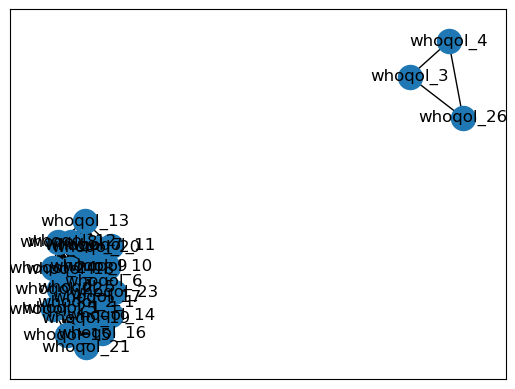

In [84]:
test = nx.from_pandas_adjacency(whoqol)
print(nx.info(test))
nx.draw_networkx(test)

Pretty difficult to see anything

In [85]:
#Loop to create gml's for all individual graphs
for adj_mat in name_list:
    #Convert dataframe to graph
    intermediate_graph = nx.from_pandas_adjacency(globals()[adj_mat])
    #Save graph as gml
    nx.write_gml(intermediate_graph, '{0}_graph.gml'.format(adj_mat))
    #print('{0}_graph_gml'.format(adj_mat))

# Overall Correlation

In [66]:
'''

function for generating the correlation to overall score for each individual test. Takes 1 input:
    d = overall dataframe containing the test
function returns a dataframe of correlations to overall score after filtering out any score with low well being.


'''
def overall_corr(d):
    # we no longer need to filter based on regex...not sure about NA values?    
    df1 = d.filter(regex='|'.join(test_list))
    
    #generate overall score
    df1['overall_score'] = df1.mean(axis = 1)
    
    # calculate cutoff point for wellbeing
    max_l = df1.max().to_list()
    cut_off = max(max_l)/2
    
    # filter dataframe to above wellbeing cutoff
    df1_filtered = df1[df1['overall_score'] > cut_off]
    
    #drop overall score
    df1_filtered.drop('overall_score', axis=1, inplace = True)    
    
    # run correlation 
    corr_df = df1.corr()#_filtered.corr()
    
    # update correlation values of 1 and negative to reflect 0s
    corr_df = corr_df.mask(corr_df == 1, 0)
    corr_df = corr_df.mask(corr_df < 0, 0)
    

    # return dict
    return corr_df

In [68]:
df.head()

,age,bio_sex,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,hispanic,orientation,marital_status,rel_services,education,income,employment,medication,psych_medication,support,phys_health,audit_1,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5,tipi_6,tipi_7,tipi_8,tipi_9,tipi_10,erq_1,erq_2,erq_3,erq_4,erq_5,erq_6,erq_7,erq_8,erq_9,erq_10,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,eq5d_1,eq5d_2,eq5d_3,eq5d_4,eq5d_5,qlesq_med_1,qlesq_med_2,qlesq_med_3,qlesq_med_4,qlesq_med_5,qlesq_med_6,qlesq_med_7,qlesq_med_8,qlesq_med_9,qlesq_med_10,qlesq_med_11,qlesq_med_12,qlesq_med_13,qlesq_med_14,qlesq_med_15,qlesq_med_16,qlesq_nomed_1,qlesq_nomed_2,qlesq_nomed_3,qlesq_nomed_4,qlesq_nomed_5,qlesq_nomed_6,qlesq_nomed_7,qlesq_nomed_8,qlesq_nomed_9,qlesq_nomed_10,qlesq_nomed_11,qlesq_nomed_12,qlesq_nomed_13,qlesq_nomed_14,qlesq_nomed_15,whoqol_1_1,whoqol_2_1,whoqol_3,whoqol_4,whoqol_5,whoqol_6,whoqol_7,whoqol_8,whoqol_9,whoqol_10,whoqol_11,whoqol_12,whoqol_13,whoqol_14,whoqol_15,whoqol_16,whoqol_17,whoqol_18,whoqol_19,whoqol_20,whoqol_21,whoqol_22,whoqol_23,whoqol_24,whoqol_25,whoqol_26,who5_1,who5_2,who5_3,who5_4,who5_5,k6_2,k6_3,k6_4,k6_5,k6_6,k6_7,pgwbi_1,pgwbi_2,pgwbi_3,pgwbi_4,pgwbi_5,pgwbi_6,pgwbi_7,pgwbi_8,pgwbi_9,pgwbi_10,pgwbi_11,pgwbi_12,pgwbi_13,pgwbi_14,pgwbi_15,pgwbi_16,pgwbi_17,pgwbi_18,pgwbi_19,pgwbi_20,pgwbi_21,pgwbi_22,sf36_13,sf36_14,sf36_15,sf36_16,sf36_17,sf36_18,sf36_19,sf36_20,sf36_21,sf36_22,sf36_23,sf36_24,sf36_25,sf36_26,sf36_27,sf36_28,sf36_29,sf36_30,sf36_31,sf36_32,mansa_yn_1,mansa_yn_2,mansa_yn_3,mansa_yn_4,sf36_1,sf36_2,sf36_3_,sf36_4,sf36_5,sf36_6,sf36_7,sf36_8,sf36_9,sf36_10,sf36_11,sf36_12,sf36_33,sf36_34,sf36_35,sf36_36
0,41,1,1,1,0,0,0,0,0,0,2,1,3,4,2,4,1,2,NaN,3,3,1,3,1,5,2,5,6,6,1,6,6,5,3,4,2,2,1,2,3,2,2,4,4,2,6,3,4,5,6,1,6,2,2,1,1,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4,2,2,1,2,2,2,4,2,1,1,2,4,2,5,1,4,4,4,4,1,2,2,2,2,5,1,2,2,0,0,1,2,2,2,3,2,4,2,2,0,5,5,4,3,4,1,1,0.0,3.0,0.0,0.0,5.0,3.0,4.0,2.0,1.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,2.0,6.0,6.0,2.0,5.0,6.0,2.0,2.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,4.0
1,32,1,1,0,0,0,0,0,1,0,2,1,3,4,5,9,1,2,NaN,3,2,4,2,4,5,4,7,6,6,4,5,4,5,6,6,4,4,4,5,5,4,4,6,5,6,4,5,6,7,7,6,4,5,7,1,1,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,4.0,4.0,4.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5,4,3,1,4,4,5,5,5,5,5,5,5,4,4,4,4,5,4,3,5,3,4,4,5,2,4,4,4,1,4,1,1,0,0,1,0,1,3,4,0,5,1,1,3,1,1,5,2.0,3.0,0.0,3.0,2.0,4.0,5.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,3.0,5.0,6.0,2.0,3.0,5.0,5.0,2.0,4.0,5.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0
2,58,1,1,1,0,0,0,0,0,0,2,3,1,1,5,4,1,2,NaN,2,4,5,6,6,5,3,6,2,6,5,5,5,6,4,6,2,6,2,6,6,2,6,2,2,1,2,2,1,7,6,1,5,1,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,4.0,3.0,3.0,2.0,3,2,3,4,2,2,3,5,2,3,2,1,5,2,2,2,2,2,2,2,1,2,2,1,1,3,1,1,0,0,2,0,1,1,1,2,2,3,0,3,2,4,3,2,2,4,2,3,0.0,1.0,0.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,2.0,1.0,0.0,0.0,0.0,5.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,5.0,1.0,5.0
3,28,1,1,1,0,0,0,0,0,0,1,1,3,6,5,4,1,2,NaN,5,2,1,1,5,7,1,6,7,2,1,7,4,5,6,5,4,6,5,6,6,5,6,6,6,3,3,4,5,6,5,4,3,5,6,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,5.0,4.0,4,4,1,1,4,4,5,5,4,3,4,4,4,2,5,2,5,5,5,3,3,2,4,4,4,2,3,4,1,1,4,0,0,1,0,0,0,2,5,4,1,5,3,2,4,2,0,5,3.0,5.0,0.0,3.0,3.0,5.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,6.0,6.0,6.0,2.0,5.0,4.0,4.0,2.0,3.0,5.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0
4,30,1,1,1,0,0,0,0,0,0,2,1,3,1,6,7,1,2,NaN,3,1,3,1,5,7,2,6,7,5,2,6,1,4,5,4,3,5,3,4,5,5,4,5,2,4,6

In [67]:
#Build out the entire correlation matrix
#Might have to rerun the loading of the data if you ran the individual components: was only pulling one
all_correlation_df = overall_corr(df)
all_correlation_df

,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,eq5d_1,eq5d_2,eq5d_3,eq5d_4,eq5d_5,whoqol_1_1,whoqol_2_1,whoqol_3,whoqol_4,whoqol_5,whoqol_6,whoqol_7,whoqol_8,whoqol_9,whoqol_10,whoqol_11,whoqol_12,whoqol_13,whoqol_14,whoqol_15,whoqol_16,whoqol_17,whoqol_18,whoqol_19,whoqol_20,whoqol_21,whoqol_22,whoqol_23,whoqol_24,whoqol_25,whoqol_26,who5_1,who5_2,who5_3,who5_4,who5_5,k6_2,k6_3,k6_4,k6_5,k6_6,k6_7,pgwbi_1,pgwbi_2,pgwbi_3,pgwbi_4,pgwbi_5,pgwbi_6,pgwbi_7,pgwbi_8,pgwbi_9,pgwbi_10,pgwbi_11,pgwbi_12,pgwbi_13,pgwbi_14,pgwbi_15,pgwbi_16,pgwbi_17,pgwbi_18,pgwbi_19,pgwbi_20,pgwbi_21,pgwbi_22,sf36_13,sf36_14,sf36_15,sf36_16,sf36_17,sf36_18,sf36_19,sf36_20,sf36_21,sf36_22,sf36_23,sf36_24,sf36_25,sf36_26,sf36_27,sf36_28,sf36_29,sf36_30,sf36_31,sf36_32,sf36_1,sf36_2,sf36_3_,sf36_4,sf36_5,sf36_6,sf36_7,sf36_8,sf36_9,sf36_10,sf36_11,sf36_12,sf36_33,sf36_34,sf36_35,sf36_36,overall_score
mansa_1,0.000000,0.631924,0.631623,0.564821,0.529311,0.559783,0.440606,0.556884,0.481247,0.506064,0.544344,0.694425,0.000000,0.000000,0.000000,0.000000,0.000000,0.736770,0.515102,0.000000,0.000000,0.727633,0.700106,0.454287,0.416576,0.517141,0.484364,0.461993,0.532592,0.362996,0.365940,0.324442,0.414820,0.512869,0.497763,0.726072,0.627267,0.472751,0.520806,0.501213,0.434086,0.445702,0.000000,0.631148,0.551797,0.499659,0.501376,0.545184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115421,0.609320,0.000000,0.440139,0.000000,0.000000,0.152335,0.000000,0.000000,0.564331,0.499002,0.126476,0.000000,0.578634,0.000000,0.531838,0.577430,0.000000,0.651196,0.000000,0.000000,0.044453,0.061476,0.049240,0.057200,0.068377,0.037547,0.069649,0.000000,0.000000,0.000000,0.000000,0.445753,0.588801,0.000000,0.000000,0.613608,0.520617,0.000000,0.483973,0.448198,0.000000,0.000000,0.219649,0.198964,0.133959,0.173214,0.000000,0.159666,0.200686,0.184982,0.145161,0.096844,0.266443,0.000000,0.356886,0.000000,0.592774
mansa_2,0.631924,0.000000,0.627181,0.440034,0.446921,0.459145,0.326474,0.389696,0.375218,0.425365,0.415005,0.524340,0.000000,0.000000,0.000000,0.010524,0.000000,0.522224,0.363701,0.000000,0.000000,0.538952,0.550265,0.399178,0.315268,0.380076,0.362731,0.367205,0.493888,0.320621,0.344195,0.205885,0.324050,0.390903,0.541942,0.566886,0.434334,0.324742,0.366207,0.320632,0.397949,0.373802,0.000000,0.449404,0.427409,0.386726,0.400046,0.458205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109327,0.457010,0.000000,0.382276,0.000000,0.000000,0.138529,0.000000,0.000000,0.430578,0.413536,0.125463,0.000000,0.464305,0.000000,0.433717,0.478995,0.000000,0.471801,0.000000,0.000000,0.057612,0.061629,0.056073,0.061578,0.075924,0.069224,0.077108,0.000000,0.000000,0.000000,0.000000,0.362738,0.445933,0.000000,0.000000,0.440892,0.419109,0.000000,0.376023,0.343210,0.000000,0.000000,0.117703,0.090797,0.077839,0.075248,0.019079,0.057728,0.091494,0.087180,0.054149,0.091322,0.223488,0.000000,0.245870,0.000000,0.520796
mansa_3,0.631623,0.627181,0.000000,0.402338,0.427354,0.512842,0.323891,0.366254,0.377827,0.376441,0.475278,0.503585,0.000000,0.000000,0.000000,0.018847,0.000000,0.548461,0.444016,0.000000,0.000000,0.503196,0.508907,0.352896,0.324376,0.430985,0.388481,0.394940,0.757632,0.327932,0.382265,0.282193,0.307148,0.423447,0.466384,0.534589,0.417848,0.362553,0.361806,0.417578,0.416725,0.429473,0.000000,0.477561,0.435199,0.435876,0.415804,0.421433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156743,0.450652,0.000000,0.361815,0.000000,0.000000,0.104203,0.000000,0.000000,0.389810,0.410524,0.155932,0.000000,0.429519,0.000000,0.437526,0.452095,0.000000,0.482574,0.000000,0.000000,0.077706,0.091474,0.080489,0.087263,0.097160,0.101159,0.096507,0.000000,0.000000,0.000000,0.000000,0.329291,0.390022,0.000000,0.000000,0.403165,0.393792,0.000000,0.381507,0.356963,0.000000,0.000000,0.203663,0.163701,0.125455,0.181707,0.054394,0.141408,0.175194,0.154782,0.121086,0.051344,0.213343,0.000000,0.300620,0.000

In [69]:
mansa

,mansa_1,mansa_2,mansa_3,mansa_4,mansa_5,mansa_6,mansa_7,mansa_8,mansa_9,mansa_10,mansa_11,mansa_12,overall_score
mansa_1,0.000000,0.497859,0.526158,0.405739,0.350785,0.368578,0.277693,0.380041,0.357229,0.342997,0.393883,0.571127,0.372674
mansa_2,0.497859,0.000000,0.543076,0.275914,0.282681,0.272852,0.163880,0.212065,0.245312,0.260748,0.252713,0.380576,0.282306
mansa_3,0.526158,0.543076,0.000000,0.241719,0.279858,0.387674,0.200379,0.224868,0.266572,0.241131,0.362680,0.377243,0.304280
mansa_4,0.405739,0.275914,0.241719,0.000000,0.449573,0.270383,0.211969,0.269753,0.330742,0.397071,0.228330,0.374713,0.287992
mansa_5,0.350785,0.282681,0.279858,0.449573,0.000000,0.457564,0.252184,0.322081,0.350544,0.309036,0.240136,0.307608,0.300171
mansa_6,0.368578,0.272852,0.387674,0.270383,0.457564,0.000000,0.438652,0.428420,0.183943,0.300720,0.231557,0.328857,0.305767
mansa_7,0.277693,0.163880,0.200379,0.211969,0.252184,0.438652,0.000000,0.362134,0.111716,0.250402,0.162445,0.301044,0.227708
mansa_8,0.380041,0.212065,0.224868,0.269753,0.322081,0.428420,0.362134,0.000000,0.293248,0.367862,0.165307,0.274718,0.275041
mansa_9,0.357229,0.245312,0.266572,0.330742,0.350544,0.183943,0.111716,0.293248,0.000000,0.269974,0.280430,0.281874,0.247632
mansa_10,0.342997,0.260748,0.241131,0.397071,0.309036,0.300720,0.250402,0.367862,0.269974,0.000000,0.257479,0.347829,0.278771
